<a href="https://colab.research.google.com/github/rioluvy/Data-analysis-and-visualization/blob/main/Encapsulation/M11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

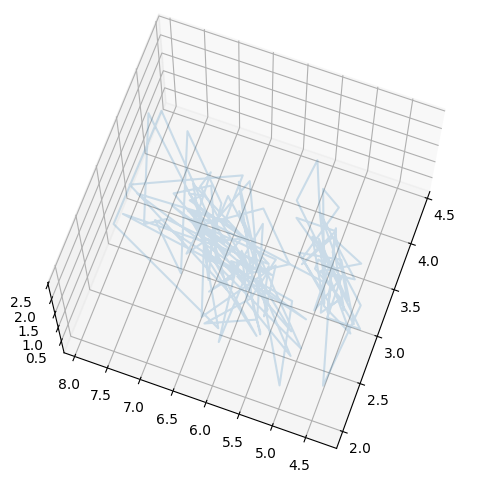

In [ ]:
## Axes3D
# 기존 pyplot의 2차원 그래프 외에 3차원 그래프가 필요한 경우
# mpl_toolkits.mplot3d에서 Axes3D 사용
# add_subplot()의 인자 projection = '3d'로 설정
# 기존 plot함수에 3개 차원의 데이터 입력

from mpl_toolkits.mplot3d import Axes3D

iris = sns.load_dataset('iris')
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111,projection = '3d')
s_w = iris.sepal_width
s_l = iris.sepal_length
p_w = iris.petal_width

ax.plot(s_w,s_l,p_w, alpha=0.2) ## alpha = 투명도
ax.view_init(elev=70.,azim=200) ## 시야각 변경

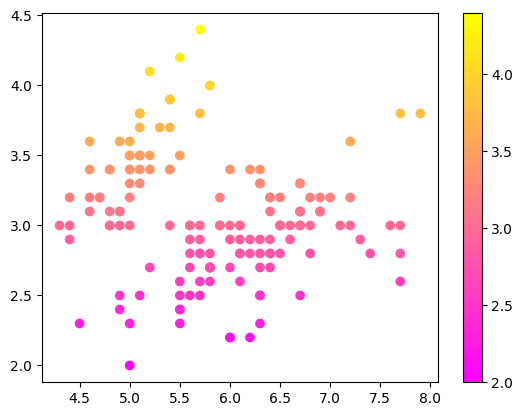

In [ ]:
## Color mapping
# 매번 직접 색상을 지정하는 과정이 번거로움
# 특정 색상 계열을 선택해 자동으로 색상 지정
# 수치 데이터 기반으로 mapping 함수가 색상을 return

length = iris.sepal_length
width = iris.sepal_width
plt.scatter(length,width,c=width) ## width를 기반으로 색상을 지정

# 프리즘 컬러맵 사용
# plt.prism() 등도 있음, plt.colormaps()를 호출하면 어떤 colormap이 있는지 알려주기 때문에 관계없음
plt.spring()

## Color Bar
# 색상 매핑의 range를 표현하는 colorbar
# plt.colorbar()를 호출하여 컬러바 추가
plt.colorbar()

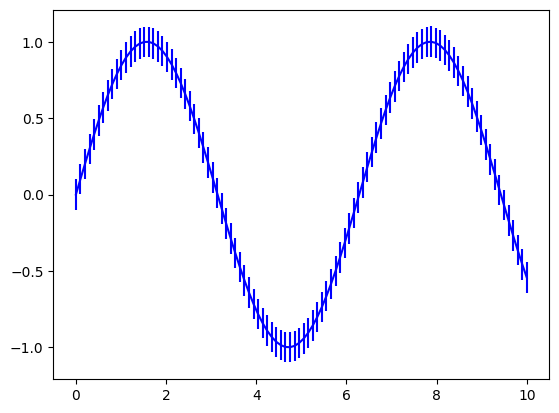

In [ ]:
## Error Bar
# 데이터의 편차를 표현하는 Error Bar
# 수치형 데이터의 편차를 표현하여 그래프의 신뢰도를 늘릴 수 있다

x = np.linspace(0,10,100)
fig = plt.figure()
yerr = [0.1]*100  # 모두 0.1크기의 errerbar 생성

# yerr생성
plt.errorbar(x,np.sin(x),yerr = yerr, color = 'blue')
plt.show()

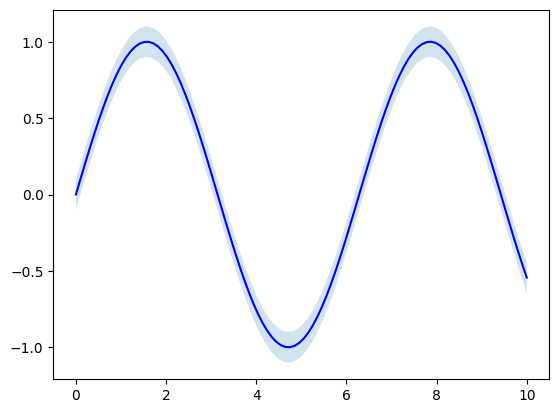

In [ ]:
## Confidence interval
# Error Bar와 유사하게 신뢰구간을 표현하기 위해 사용
# plt.fill_between(x,y_bottom,y_top) 형식으로 사용
# alpha값을 지정하여 투명도 조절 가능

x = np.linspace(0,10,100)
fig = plt.figure()
yerr = 0.1
plt.plot(x,np.sin(x),color = 'b')

#interval 생성
plt.fill_between(x,np.sin(x)-yerr, np.sin(x)+yerr, alpha = 0.2)
plt.show()

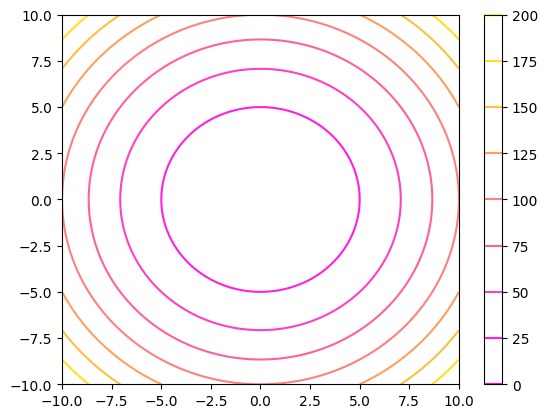

<ipython-input-14-b64e0240383a>:19: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(xmesh,ymesh,zmesh, level = 15, cmap = 'spring')


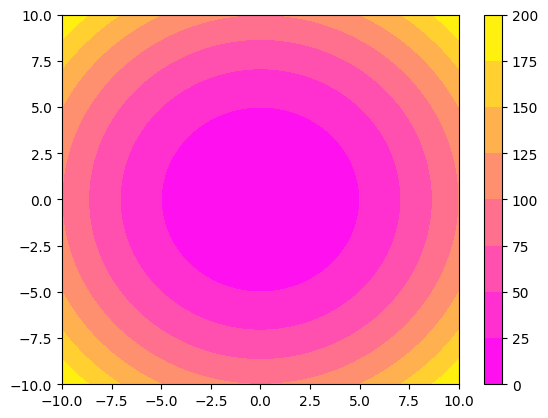

In [ ]:
## 등치선 플롯(contour)
# 같은 level에 있는 수치형 데이터를 연결한 등치선 플롯
# x,y축의 mesh grid가 필요: np.meshgrid(x,y): x값과 y값을 엮어주는 함수
# plt.contour(xmesh,ymesh,zmesh) 사용
# colorbar와 함께 사용 가능

def f(x,y):
  return x**2 + y**2

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
xmesh, ymesh = np.meshgrid(x,y)
zmesh = f(xmesh,ymesh)

plt.contour(xmesh,ymesh,zmesh)
plt.colorbar()
plt.show()

plt.contourf(xmesh,ymesh,zmesh, level = 15, cmap = 'spring')
plt.colorbar()
plt.show()

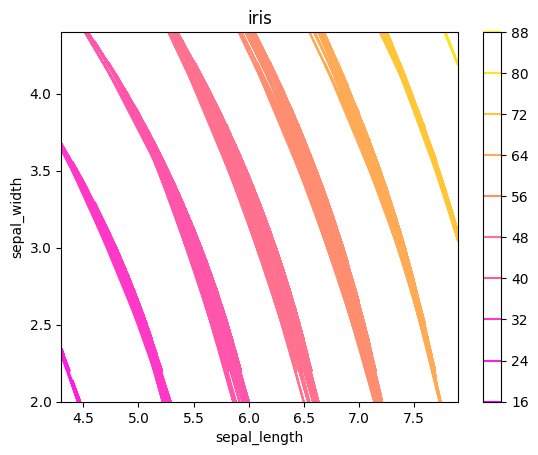

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Iris 데이터 불러오기 (Seaborn의 load_dataset 사용)
iris_data = sns.load_dataset('iris')
x = np.array(iris_data['sepal_length'])
y = np.array(iris_data['sepal_width'])

def f(x,y): # z level 를 결정하는 함수
    return x**2 + y**2

xmesh, ymesh = np.meshgrid(x,y) # x,y mesh 형성
z = f(xmesh,ymesh) # z mesh 형성

# 등고선 그래프 생성 (contour 사용)
plt.contour(xmesh,ymesh,z)

# 컬러바 설정
plt.colorbar()

# 그래프 제목 설정
plt.title('iris')

# x, y 축 레이블 설정
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

# 그래프 출력
plt.show()


<ipython-input-26-fcade4abb1f4>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = titanic_data['age'].groupby(pd.qcut(titanic_data['age'], 10)).size()


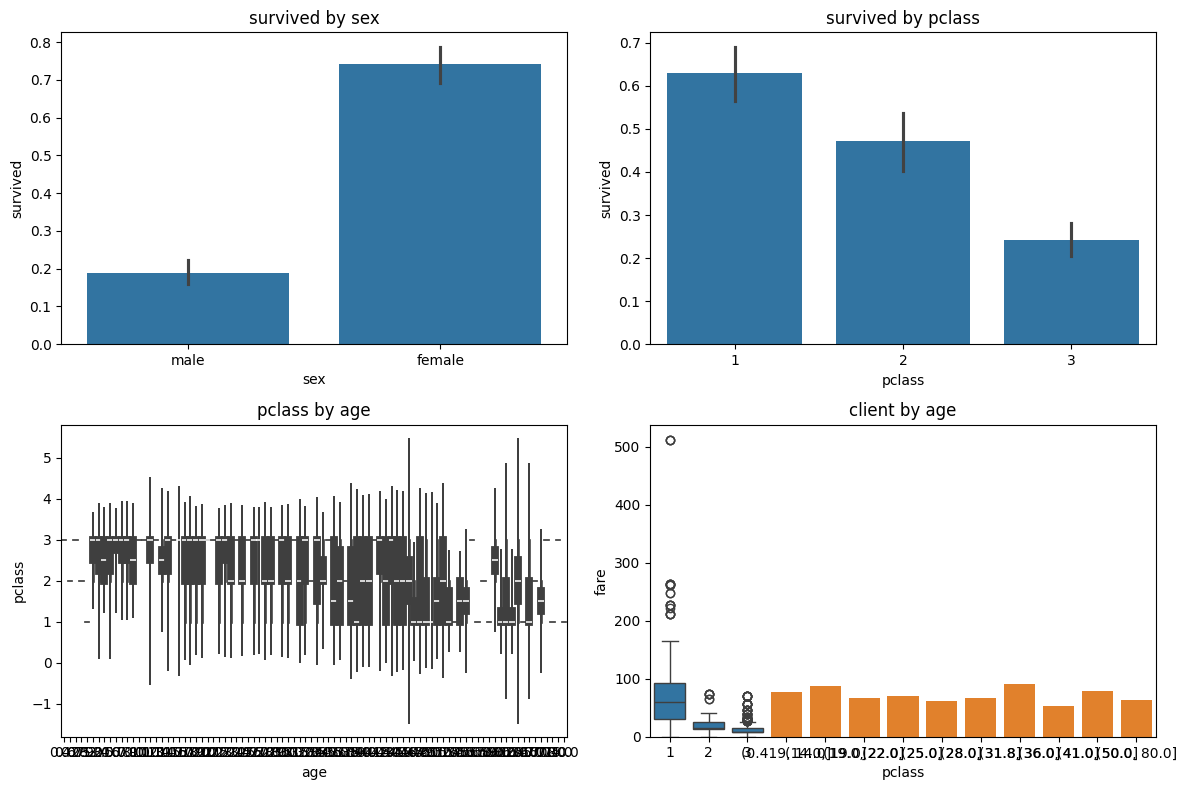

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Titanic 데이터 불러오기
titanic_data = sns.load_dataset('titanic')

# 그래프 레이아웃 설정
plt.figure(figsize = (12,8))

# 1. 성별에 따른 생존율
ax1 = plt.subplot(221)
sns.barplot(x = 'sex', y = 'survived', data = titanic_data)
ax1.set_title('survived by sex')

# 2. 좌석 등급에 따른 생존율
ax2 = plt.subplot(222)
sns.barplot(x = 'pclass', y = 'survived', data = titanic_data)
ax2.set_title('survived by pclass')

# 3. 나이에 따른 좌석 등급
ax3 = plt.subplot(223)
sns.violinplot(x='age',y = 'pclass', data = titanic_data)
ax3.set_title('pclass by age')

# 4. 좌석 등급에 따른 fare
ax4 = plt.subplot(224)
sns.boxplot(x='pclass',y = 'fare', data = titanic_data)
ax4.set_title('fare by pclass')

# 5. 각 10대, 20대 등 나이별 탑승자 수
age_groups = titanic_data['age'].groupby(pd.qcut(titanic_data['age'], 10)).size()
ax5 = sns.barplot(x=age_groups.index, y=age_groups)
ax5.set_title('client by age')

# 그래프 출력
plt.tight_layout()
plt.show()


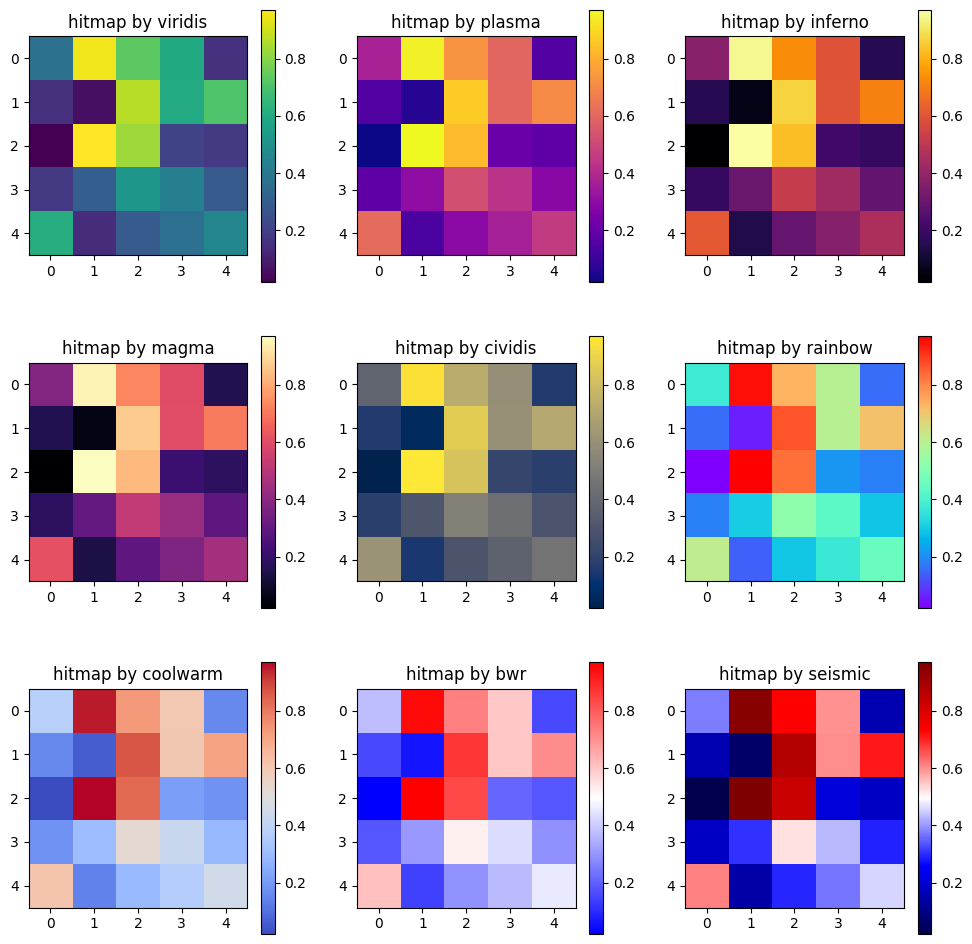

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image():
    # 시드 고정 (수정 금지)
    np.random.seed(42)

    # 1. 2차원 가상의 데이터 생성
    data = np.random.rand(5,5)

    cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'rainbow', 'coolwarm', 'bwr', 'seismic']

    # 2. subplot 생성 (3 x 3), figure size 설정
    fig, axes = plt.subplots(3,3,figsize = (12,12))

    # 3. subplot을 사용하여 각 color map별로 히트맵 생성
    for cmap, ax in zip(cmaps, axes.flatten()):
        im = ax.imshow(data,cmap = cmap)
        ## to do - title 설정
        ax.set_title(f'hitmap by {cmap}')
        ## to do - colorbar 추가
        fig.colorbar(im,ax = ax)

    # 테스트 코드 (수정 금지)
    plt.savefig("colormap.png")

plot_image()